# Text Classification

# Dataset OpenI:
### Description:
Open-i service of the National Library of Medicine enables search and retrieval of abstracts and images (including charts, graphs, clinical images, etc.) from the open source literature, and biomedical image collections. Searching may be done using text queries as well as query images. Open-i provides access to over 3.7 million images from about 1.2 million PubMed Central® articles; 7,470 chest x-rays with 3,955 radiology reports; 67,517 images from NLM History of Medicine collection; and 2,064 orthopedic illustrations. <br>

### Data Visualization:
# ![ola](Images/example.png)

### Download Reports XML:

In [1]:
import requests
url = "https://openi.nlm.nih.gov/imgs/collections/NLMCXR_reports.tgz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)
print("Finished")

Finished


#### After the script finishes, a new file NLMCXR_reports.tgz should be visible on your working directory

### Extract files:

In [3]:
import tarfile
fname="NLMCXR_reports.tgz"
tar = tarfile.open(fname)
tar.extractall()
tar.close()
print("Finished")

Finished


#### After the script finishes, a new folder is created: "./ecgen-radiology" with all the .xml files

### Visualize XML files:

In [18]:
from pygments import highlight
from pygments.lexers import XmlLexer
from xml.dom import minidom

from pygments.formatters import HtmlFormatter
import IPython
from IPython.core.display import HTML

def display_xml_nice(xml_element):
    formatter = HtmlFormatter()
    xml_indented = xml_element.toprettyxml(indent='  ',newl="")
    IPython.display.display(HTML('<style type="text/css">{}</style>    {}'.format(
    formatter.get_style_defs('.highlight'),
    highlight(xml_indented, XmlLexer(), formatter))))
    
domf = minidom.parse('./ecgen-radiology/1.xml')
display_xml_nice(domf)

### Create Dataset:

In [23]:
import glob
import re
import os.path
import pandas as pd
import numpy as np
import xml.dom.minidom as minidom

def getText(file):
    stringa = file.find("<Abstract>")
    stringb = file.find("</Abstract>")
    if stringa == -1 or stringb == -1:
        print("No abstract")
        return "NO ABSTRACT"
    all = file[stringa:stringb]
    all = re.sub("<Abstract>", "", all)
    all = re.sub("<AbstractText Label=", "", all)
    all = re.sub("</AbstractText>", "", all)
    all = re.sub(" +", " ", all)
    all = re.sub('\"', "", all)
    all = re.sub('>', " ", all)
    all = re.sub('\n', "", all)
    return all

def getLabels(doc):
    # GET LABELS
    value = []
    for idx2, node in enumerate(doc.getElementsByTagName('MeSH')):
        for elem in node.childNodes:
            string = elem.toxml()
            string = re.sub("<automatic>", "", string)
            string = re.sub("</automatic>", "", string)
            string = re.sub("<major>", "", string)
            string = re.sub("</major>", "", string)
            string = re.sub("\n", "", string)
            if "  " not in string:
                value.append(string)

    return value

def xmlToDF():
    df = pd.DataFrame(columns=["Labels","Report"])
    for idx, file in enumerate(glob.glob("./ecgen-radiology/*.xml")):
        doc = minidom.parse(file)
        file = doc.toxml()

        labels = getLabels(doc)
        text = getText(file)

        df.at[idx, "Labels"]= labels
        df.at[idx, "Report"]= text


    df.to_csv("dataset.csv",index=False)
    print("Finished")
    
xmlToDF()

### Visualize Draft Dataset:

In [24]:
import pandas as pd
from IPython.display import display_html
df = pd.read_csv("dataset.csv", nrows=100)
df2_styler = df.reset_index(drop=True).style.set_table_attributes("style='display:inline'").set_caption('Dataset Entries')
display_html(df2_styler._repr_html_(), raw=True)

,Labels,Report
0,['normal'],COMPARISON None. INDICATION Positive TB test FINDINGS The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. IMPRESSION Normal chest x-XXXX.
1,"['Calcified Granuloma/lung/upper lobe/right', 'calcified granuloma']","COMPARISON Chest radiographs XXXX. INDICATION XXXX-year-old male, chest pain. FINDINGS The cardiomediastinal silhouette is within normal limits for size and contour. The lungs are normally inflated without evidence of focal airspace disease, pleural effusion, or pneumothorax. Stable calcified granuloma within the right upper lung. No acute bone abnormality.. IMPRESSION No acute cardiopulmonary process."
2,['normal'],COMPARISON None. INDICATION/ FINDINGS Both lungs are clear and expanded. Heart and mediastinum normal. IMPRESSION No active disease.
3,"['Opacity/lung/upper lobe/right', 'Pulmonary Atelectasis/upper lobe/right', 'Opacity/lung/lingula', 'atelectases', 'mass lesion', 'opacity', 'Atelectasis', 'Ribs']","COMPARISON XXXX PA and lateral chest radiographs INDICATION XXXX-year-old male, XXXX. FINDINGS There is XXXX increased opacity within the right upper lobe with possible mass and associated area of atelectasis or focal consolidation. The cardiac silhouette is within normal limits. XXXX opacity in the left midlung overlying the posterior left 5th rib may represent focal airspace disease. No pleural effusion or pneumothorax. No acute bone abnormality. IMPRESSION 1. Increased opacity in the right upper lobe with XXXX associated atelectasis may represent focal consolidation or mass lesion with atelectasis. Recommend chest CT for further evaluation. 2. XXXX opacity overlying the left 5th rib may represent focal airspace disease."
4,"['Markings/lung/bilateral/interstitial/diffuse/prominent', 'Fibrosis/diffuse', 'diffuse fibrosis', 'Fibrosis', 'Pulmonary Fibrosis']","COMPARISON None INDICATION dyspnea, subjective fevers, arthritis, immigrant from Bangladesh FINDINGS Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal. IMPRESSION Diffuse fibrosis. No visible focal acute disease."
5,"['Mastectomy/left', 'mastectomies', 'Mastectomy', 'surgery']",COMPARISON/ INDICATION History of chest pain FINDINGS/ IMPRESSION Status post left mastectomy. Heart size normal. Lungs are clear.
6,"['Density/retrocardiac', 'Calcinosis/blood vessels', 'Calcified Granuloma', 'Opacity/lung/base/left', 'Bone Diseases, Metabolic/spine', 'atelectases', 'calcified granuloma', 'hiatal hernia', 'opacity', 'osteopenia', 'vascular calcification', 'Atelectasis', 'Hiatal Hernia']",COMPARISON/ INDICATION Acute bronchitis. FINDINGS Heart size and pulmonary vascularity appear within normal limits. Retrocardiac soft tissue density is present. There appears to be air within this which could suggest that this represents a hiatal hernia. Vascular calcification is noted. Calcified granuloma is seen. There has been interval development of bandlike opacity in the left lung base. This may represent atelectasis. No pneumothorax or pleural effusion is seen. Osteopenia is present in the spine. IMPRESSION 1. Retrocardiac soft tissue density. The appearance suggests hiatal hernia. 2. XXXX left base bandlike opacity. The appearance suggests atelectasis.
7,"['Aorta/tortuous', 'Shoulder/bilateral/degenerative', 'Spine/degenerative', 'Catheters, Indwelling', 'degenerative change']","COMPARISON Two views of the chest dated XXXX. INDICATION XXXX-year-old with XXXX for one month. History bronchitis. FINDINGS The heart, pulmonary XXXX and mediastinum are within normal limits. There is no pleural effusion or pneumothorax. There is no focal air space opacity to suggest a pneumonia. The aorta is tortuous and ectatic. There are degenerative changes of the acromioclavicular joints. There degenerative changes of the spine. There is an IVC XXX

### Polish Draft Dataset:

In [25]:
# Lets start by cleaning the labels text

from nltk.tokenize import word_tokenize
def labelsprocessing():
    df = pd.read_csv("dataset.csv")

    for idx,x in enumerate(df["Labels"]):
        x = re.sub("","",x)
        x = re.sub("\[", "", x)
        x = re.sub("]", "", x)
        x = re.sub("/", " ", x)
        x = re.sub(",", " ", x)
        x = re.sub("'", " ", x)
        x = re.sub("{ }+ ", " ", x)
        x = re.sub(' +', ' ',x)
        words = word_tokenize(x)
        words = [word.lower() for word in words]
        df.at[idx, "Labels"]= " ".join(words)
    df.to_csv("dataset.csv",index=False)
    print(df.head(5))
    print("Finished")
        
labelsprocessing()

                                              Labels  \
0                                             normal   
1  calcified granuloma lung upper lobe right calc...   
2                                             normal   
3  opacity lung upper lobe right pulmonary atelec...   
4  markings lung bilateral interstitial diffuse p...   

                                              Report  
0    COMPARISON None.  INDICATION Positive TB tes...  
1    COMPARISON Chest radiographs XXXX.  INDICATI...  
2    COMPARISON None.  INDICATION/   FINDINGS Bot...  
3    COMPARISON XXXX PA and lateral chest radiogr...  
4    COMPARISON None  INDICATION dyspnea, subject...  
Finished


In [26]:
# Now we will use the Label set defined by the MIMIC-CXR dataset
ITEMS = {'No findings':['normal'],
             'Enlarged Cardiomediastinum': ['enlarged mediastinum'],
             'Cardiomegaly': ['cardiomegaly'],
             'Airspace Opacity': ['opacity'],
             'Lung Lesion': ['lung'],
             'Edema': ['edema','edemas'],
             'Consolidation': ['consolidation'],
             'Pneumonia': ['pneumonia'],
             'Atelectasis': ['atelectasis'],
             'Pneumothorax': ['pneumothorax','hydropneumothorax'],
             'Pleural Effusion': ['pleural effusion','pleural effusions'],
             'Pleural Other': ["pleural thickening",'pleural diseases'],
             'Fracture': ['fracture','fractures'],
             'Support Devices': ['medical device']}

def transformToLabels():
    df = pd.read_csv("dataset.csv")
    #Init labels with 0s
    for label in ITEMS.keys():
        df[label] = 0
        
    #Populate 
    for label in ITEMS.keys():
        print(label)
        for code in ITEMS.get(label):
            if code == "normal":
                idx = df.index[df['Labels'] == "normal"]
                df.loc[idx,label] = 1
            else:
                df.loc[df['Labels'].str.contains(code), label] = 1
    df.to_csv("dataset.csv",index=False)
    print(df.head(5))
    print("Finished")
    

transformToLabels()


No findings
Enlarged Cardiomediastinum
Cardiomegaly
Airspace Opacity
Lung Lesion
Edema
Consolidation
Pneumonia
Atelectasis
Pneumothorax
Pleural Effusion
Pleural Other
Fracture
Support Devices
                                              Labels  \
0                                             normal   
1  calcified granuloma lung upper lobe right calc...   
2                                             normal   
3  opacity lung upper lobe right pulmonary atelec...   
4  markings lung bilateral interstitial diffuse p...   

                                              Report  No findings  \
0    COMPARISON None.  INDICATION Positive TB tes...            1   
1    COMPARISON Chest radiographs XXXX.  INDICATI...            0   
2    COMPARISON None.  INDICATION/   FINDINGS Bot...            1   
3    COMPARISON XXXX PA and lateral chest radiogr...            0   
4    COMPARISON None  INDICATION dyspnea, subject...            0   

   Enlarged Cardiomediastinum  Cardiomegaly  Airspace Op

In [27]:
# Instances with no "patologies labels" with 1s should have the "label No Findings" with 1.
import pandas as pd
LABELS = ['No findings','Enlarged Cardiomediastinum','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']


def noFindings():
    df2 = pd.read_csv("dataset.csv")
    df = pd.read_csv("dataset.csv",usecols=ITEMS)
    values = df.sum(axis=1)
    for idx,total in enumerate(values):
        if total==0:
            df2.at[idx,'No findings']=1
    df2.to_csv("dataset.csv",index=False)
    print(df.head(5))
    print("Finished")
    
noFindings()

        

   No findings  Enlarged Cardiomediastinum  Cardiomegaly  Airspace Opacity  \
0            1                           0             0                 0   
1            0                           0             0                 0   
2            1                           0             0                 0   
3            0                           0             0                 1   
4            0                           0             0                 0   

   Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  Pneumothorax  \
0            0      0              0          0            0             0   
1            1      0              0          0            0             0   
2            0      0              0          0            0             0   
3            1      0              0          0            1             0   
4            1      0              0          0            0             0   

   Pleural Effusion  Pleural Other  Fracture  Support Devices 

### Visualize Final Dataset:

In [28]:
import pandas as pd
from IPython.display import display_html
df = pd.read_csv("dataset.csv", nrows=100)
df2_styler = df.reset_index(drop=True).style.set_table_attributes("style='display:inline'").set_caption('Dataset Entries')
display_html(df2_styler._repr_html_(), raw=True)

,Labels,Report,No findings,Enlarged Cardiomediastinum,Cardiomegaly,Airspace Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,normal,COMPARISON None. INDICATION Positive TB test FINDINGS The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. IMPRESSION Normal chest x-XXXX.,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,calcified granuloma lung upper lobe right calcified granuloma,"COMPARISON Chest radiographs XXXX. INDICATION XXXX-year-old male, chest pain. FINDINGS The cardiomediastinal silhouette is within normal limits for size and contour. The lungs are normally inflated without evidence of focal airspace disease, pleural effusion, or pneumothorax. Stable calcified granuloma within the right upper lung. No acute bone abnormality.. IMPRESSION No acute cardiopulmonary process.",0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,normal,COMPARISON None. INDICATION/ FINDINGS Both lungs are clear and expanded. Heart and mediastinum normal. IMPRESSION No active disease.,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,opacity lung upper lobe right pulmonary atelectasis upper lobe right opacity lung lingula atelectases mass lesion opacity atelectasis ribs,"COMPARISON XXXX PA and lateral chest radiographs INDICATION XXXX-year-old male, XXXX. FINDINGS There is XXXX increased opacity within the right upper lobe with possible mass and associated area of atelectasis or focal consolidation. The cardiac silhouette is within normal limits. XXXX opacity in the left midlung overlying the posterior left 5th rib may represent focal airspace disease. No pleural effusion or pneumothorax. No acute bone abnormality. IMPRESSION 1. Increased opacity in the right upper lobe with XXXX associated atelectasis may represent focal consolidation or mass lesion with atelectasis. Recommend chest CT for further evaluation. 2. XXXX opacity overlying the left 5th rib may represent focal airspace disease.",0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,markings lung bilateral interstitial diffuse prominent fibrosis diffuse diffuse fibrosis fibrosis pulmonary fibrosis,"COMPARISON None INDICATION dyspnea, subjective fevers, arthritis, immigrant from Bangladesh FINDINGS Interstitial markings are diffusely prominent throughout both lungs. Heart size is normal. Pulmonary XXXX normal. IMPRESSION Diffuse fibrosis. No visible focal acute disease.",0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,mastectomy left mastectomies mastectomy surgery,COMPARISON/ INDICATION History of chest pain FINDINGS/ IMPRESSION Status post left mastectomy. Heart size normal. Lungs are clear.,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,density retrocardiac calcinosis blood vessels calcified granuloma opacity lung base left bone diseases metabolic spine atelectases calcified granuloma hiatal hernia opacity osteopenia vascular calcification atelectasis hiatal hernia,COMPARISON/ INDICATION Acute bronchitis. FINDINGS Heart size and pulmonary vascularity appear within normal limits. Retrocardiac soft tissue density is present. There appears to be air within this which could suggest that this represents a hiatal hernia. Vascular calcification is noted. Calcified granuloma is seen. There has been interval development of bandlike opacity in the left lung base. This may represent atelectasis. No pneumothorax or pleural effusion is seen. Osteopenia is present in the spine. IMPRESSION 1. Retrocardiac soft tissue density. The appearance suggests hiatal hernia. 2. XXXX left base bandlike opacity. The appearance suggests atelectasis.,0,0,0,1,1,0,0,0,1,0,0,0,0,0
7,aorta tortuous shoulder bilateral degenerative spine degenerative catheters indwelling degenerative change,"COMPARISON Two views of the chest dated XXXX. INDICATION XXXX-year-old with XXXX for one month. History bronchitis. FINDINGS The heart, pulmonary XXXX and mediastinum are within normal limits. There is no pleu

### Visualize Dataset Statistics:

[('No findings', 2153), ('Enlarged Cardiomediastinum', 2), ('Cardiomegaly', 379), ('Airspace Opacity', 463), ('Lung Lesion', 1406), ('Edema', 77), ('Consolidation', 30), ('Pneumonia', 87), ('Atelectasis', 392), ('Pneumothorax', 27), ('Pleural Effusion', 186), ('Pleural Other', 40), ('Fracture', 100), ('Support Devices', 134)]


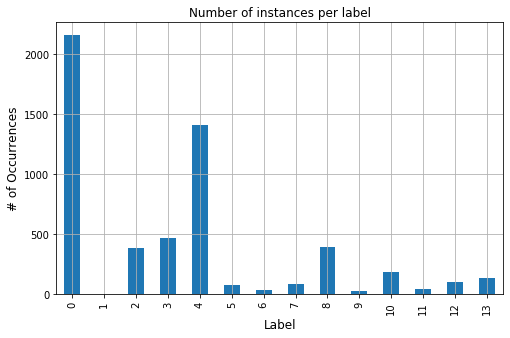

In [31]:
import matplotlib.pyplot as plt

LABELS = ['No findings','Enlarged Cardiomediastinum','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

def fixNoFindings():
    df = pd.read_csv("dataset.csv",usecols =LABELS)
    counts = []
    categories = list(df.columns.values)
    for i in categories:
        counts.append((i, df[i].sum()))
    print(counts)
    df_stats = pd.DataFrame(counts)
    
    df_stats.plot(kind='bar', legend=False, grid=True, figsize=(8, 5))
    plt.title("Number of instances per label")
    plt.ylabel('# of Occurrences', fontsize=12)
    plt.xlabel('Label', fontsize=12)

fixNoFindings()

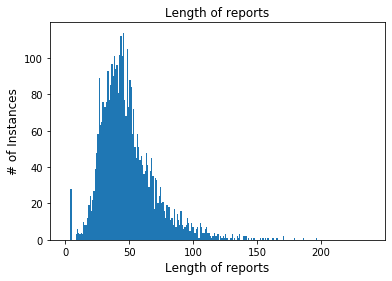

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
df = pd.read_csv("dataset.csv",usecols =['Report'])
df['text_length'] = df['Report'].str.split().str.len()
tlen = df['text_length'].values

fig, ax = plt.subplots()
plt.hist(tlen, bins=np.arange(max(tlen)), histtype='barstacked', linewidth=2)
plt.title("Length of reports")
plt.ylabel('# of Instances', fontsize=12)
plt.xlabel('Length of reports', fontsize=12)
plt.show()

### Preprocess Dataset:

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
import pandas as pd

def prepareTextFeatures():
    df = pd.read_csv("dataset.csv",usecols =['Report'])
    texts = df.values
    processeddocs = []
    for idx, sentence in enumerate(texts):
        processedSentence = text_to_word_sequence(sentence[0])
        corpus = ''
        for word in processedSentence:
            corpus = corpus + ' ' + word
        processeddocs.append(corpus)
        
    print(processeddocs[:1])
    return processeddocs
corpus = prepareTextFeatures()

### Attempt 1 Naive Bayes:

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction import text
import pandas as pd

LABELS = ['No findings','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

df = pd.read_csv("dataset.csv")
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train["Report"].values
X_test = test["Report"].values

ngram=4
minf=0.05
maxf=0.95
stopwords = text.ENGLISH_STOP_WORDS

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(sublinear_tf=True,norm='l2',stop_words=stopwords,
                                          strip_accents='ascii', lowercase=True, ngram_range=(1, ngram),
                                          min_df=minf, max_df=maxf)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

total=0
for category in LABELS:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    fpr, tpr, _ = roc_curve(test[category], prediction)
    roc_auc = auc(fpr, tpr)
    total+=roc_auc
    print('Test auc is {}'.format(roc_auc))

print("Macro Average AUC:" + str(total/13))

... Processing No findings
Test auc is 0.8573906137012932
... Processing Cardiomegaly
Test auc is 0.7940033259201378
... Processing Airspace Opacity
Test auc is 0.681805835037945
... Processing Lung Lesion
Test auc is 0.8025390137689603
... Processing Edema
Test auc is 0.5
... Processing Consolidation
Test auc is 0.5
... Processing Pneumonia
Test auc is 0.5
... Processing Atelectasis
Test auc is 0.6981636310278297
... Processing Pneumothorax
Test auc is 0.5
... Processing Pleural Effusion
Test auc is 0.5789473684210527
... Processing Pleural Other
Test auc is 0.5
... Processing Fracture
Test auc is 0.5
... Processing Support Devices
Test auc is 0.5
Macro Average AUC:0.6086807529136322


### Attempt 2 Support Vector Machines (Linear Kernel):

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction import text
import pandas as pd

LABELS = ['No findings','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

df = pd.read_csv("dataset.csv")
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train["Report"].values
X_test = test["Report"].values

ngram=4
minf=0.05
maxf=0.95
stopwords = text.ENGLISH_STOP_WORDS

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(sublinear_tf=True,norm='l2',stop_words=stopwords,
                                          strip_accents='ascii', lowercase=True, ngram_range=(1, ngram),
                                          min_df=minf, max_df=maxf)),
                ('clf', OneVsRestClassifier(svm.SVC(kernel='linear',gamma='scale')))])

total=0
for category in LABELS:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    fpr, tpr, _ = roc_curve(test[category], prediction)
    roc_auc = auc(fpr, tpr)
    total+=roc_auc
    print('Test auc is {}'.format(roc_auc))

print("Macro Average AUC:" + str(total/13))

... Processing No findings
Test auc is 0.8813554298991192
... Processing Cardiomegaly
Test auc is 0.9168987464353215
... Processing Airspace Opacity
Test auc is 0.922261395952171
... Processing Lung Lesion
Test auc is 0.8636389358314494
... Processing Edema
Test auc is 0.6333333333333333
... Processing Consolidation
Test auc is 0.5
... Processing Pneumonia
Test auc is 0.8032263630089718
... Processing Atelectasis
Test auc is 0.9828351638745451
... Processing Pneumothorax
Test auc is 0.5
... Processing Pleural Effusion
Test auc is 0.7958436924978579
... Processing Pleural Other
Test auc is 0.5
... Processing Fracture
Test auc is 0.5
... Processing Support Devices
Test auc is 0.5
Macro Average AUC:0.7153379277563668


### Attempt 3 Support Vector Machines (Radial Kernel):

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction import text
import pandas as pd

LABELS = ['No findings','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

df = pd.read_csv("dataset.csv")
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train["Report"].values
X_test = test["Report"].values

ngram=4
minf=0.05
maxf=0.95
stopwords = text.ENGLISH_STOP_WORDS

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(sublinear_tf=True,norm='l2',stop_words=stopwords,
                                          strip_accents='ascii', lowercase=True, ngram_range=(1, ngram),
                                          min_df=minf, max_df=maxf)),
                ('clf', OneVsRestClassifier(svm.SVC(kernel='rbf',gamma='scale')))])

total=0
for category in LABELS:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    fpr, tpr, _ = roc_curve(test[category], prediction)
    roc_auc = auc(fpr, tpr)
    total+=roc_auc
    print('Test auc is {}'.format(roc_auc))

print("Macro Average AUC:" + str(total/13))

... Processing No findings
Test auc is 0.8825325699112107
... Processing Cardiomegaly
Test auc is 0.9208357543093373
... Processing Airspace Opacity
Test auc is 0.8967836889458016
... Processing Lung Lesion
Test auc is 0.8578759327422428
... Processing Edema
Test auc is 0.5666666666666667
... Processing Consolidation
Test auc is 0.5
... Processing Pneumonia
Test auc is 0.8036145617667357
... Processing Atelectasis
Test auc is 0.9800409608312053
... Processing Pneumothorax
Test auc is 0.5
... Processing Pleural Effusion
Test auc is 0.7535853243998708
... Processing Pleural Other
Test auc is 0.5
... Processing Fracture
Test auc is 0.5
... Processing Support Devices
Test auc is 0.5
Macro Average AUC:0.7047642661210056


### Attempt 4 Multi Layer Perceptron:

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from keras_tqdm import TQDMNotebookCallback

from sklearn.metrics import roc_curve, auc
LABELS = ['No findings','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=(100), activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(1024, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(13, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

df = pd.read_csv("dataset.csv")
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train["Report"].values
X_test = test["Report"].values
Y_train = train[LABELS].values
Y_test = test[LABELS].values


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Report"].values)

print(X_train[0])
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=100, padding='post')
                 
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=100, padding='post')

model = create_model()

model.fit(X_train, Y_train,batch_size=128,validation_split=0.2, epochs=10,verbose=0,callbacks=[TQDMNotebookCallback(leave_inner=True)])


total=0
prediction = model.predict(X_test)
for idx,category in enumerate(LABELS):
    fpr, tpr, _ = roc_curve(Y_test[:, idx], prediction[:, idx])
    roc_auc = auc(fpr, tpr)
    total+=roc_auc
    print('Test auc is {}'.format(roc_auc))

print("Macro Average AUC:" + str(total/13))

  COMPARISON None.  INDICATION XXXX-year-old with chest pain.  FINDINGS No focal consolidation, suspicious pulmonary opacity, pneumothorax or definite pleural effusion. Heart size and pulmonary vascularity within normal limits, visualized osseous structures appear intact.  IMPRESSION No acute cardiopulmonary abnormality.  
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 256)               25856     
_________________________________________________________________
dropout_53 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_305 (Dense)            (None, 512)               131584    
_________________________________________________________________
dropout_54 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_306 (Dens

HBox(children=(IntProgress(value=0, description='Training', max=10, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))


Test auc is 0.7540713870810958
Test auc is 0.6482405348186439
Test auc is 0.7511655108568516
Test auc is 0.7268534594737803
Test auc is 0.6557471264367817
Test auc is 0.7648717948717949
Test auc is 0.8002501725327813
Test auc is 0.7336422046418112
Test auc is 0.6796153846153846
Test auc is 0.6567359150478278
Test auc is 0.6377674258109042
Test auc is 0.7776932888540031
Test auc is 0.7927923165036568
Macro Average AUC:0.7214958862727167


### Attempt 5 Convolution Network

In [55]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Input, Embedding
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_curve, auc
LABELS = ['No findings','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

def create_model(voc):
    sequence_input = Input(shape=(100,), dtype='int32')
    embedded_sequences = Embedding(voc, 64, input_length=100)(sequence_input)
    l_cov1= Conv1D(128, 3, activation='relu')(embedded_sequences)
    l_pool1 = MaxPooling1D(5)(l_cov1)
    l_cov2 = Conv1D(128, 3, activation='relu')(l_pool1)
    l_pool2 = MaxPooling1D(17)(l_cov2)  # global max pooling
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(128, activation='relu')(l_flat)
    preds = Dense(13, activation='sigmoid')(l_dense)
    model = Model(inputs=sequence_input, outputs=preds)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

df = pd.read_csv("dataset.csv")
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train["Report"].values
X_test = test["Report"].values
Y_train = train[LABELS].values
Y_test = test[LABELS].values


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Report"].values)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=100, padding='post')
voc_size = len(tokenizer.word_index)
                 
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=100, padding='post')

print(voc_size)
model = create_model(voc_size)

model.fit(x=X_train, y=Y_train,batch_size=128,validation_split=0.2, epochs=10,verbose=0,callbacks=[TQDMNotebookCallback(leave_inner=True)])


total=0
prediction = model.predict(X_test)
for idx,category in enumerate(LABELS):
    fpr, tpr, _ = roc_curve(Y_test[:, idx], prediction[:, idx])
    roc_auc = auc(fpr, tpr)
    total+=roc_auc
    print('Test auc is {}'.format(roc_auc))

print("Macro Average AUC:" + str(total/13))

2862
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 100, 64)           183168    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 98, 128)           24704     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 17, 128)           49280     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_____

HBox(children=(IntProgress(value=0, description='Training', max=10, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))


Test auc is 0.9769195206088409
Test auc is 0.857633253858535
Test auc is 0.9012655701717914
Test auc is 0.9525764392074553
Test auc is 0.9315047021943574
Test auc is 0.9382051282051282
Test auc is 0.8866890959282263
Test auc is 0.9161988848163943
Test auc is 0.920128205128205
Test auc is 0.9004958352647029
Test auc is 0.8311335403726707
Test auc is 0.6341248037676609
Test auc is 0.7937263194995153
Macro Average AUC:0.8800462537710371


# Attempt 6 Recurrent Neural Network

In [59]:
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Bidirectional, Flatten, Input, Embedding
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import roc_curve, auc
LABELS = ['No findings','Cardiomegaly','Airspace Opacity',
             'Lung Lesion','Edema','Consolidation','Pneumonia','Atelectasis',
             'Pneumothorax','Pleural Effusion','Pleural Other','Fracture','Support Devices']

def create_model(voc):
    sequence_input = Input(shape=(100,), dtype='int32')
    embedded_sequences = Embedding(voc, 64, input_length=100)(sequence_input)
    rnn_layer = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2,recurrent_dropout=0.2),
                              merge_mode='concat')(embedded_sequences)
    l_flat = Flatten()(rnn_layer)
    l_dense = Dense(128, activation='relu')(l_flat)
    preds = Dense(13, activation='sigmoid')(l_dense)
    model = Model(inputs=sequence_input, outputs=preds)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

df = pd.read_csv("dataset.csv")
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train["Report"].values
X_test = test["Report"].values
Y_train = train[LABELS].values
Y_test = test[LABELS].values


tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Report"].values)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=100, padding='post')
voc_size = len(tokenizer.word_index)
                 
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=100, padding='post')

print(voc_size)
model = create_model(voc_size)

model.fit(x=X_train, y=Y_train,batch_size=128,validation_split=0.2, epochs=10,verbose=0,callbacks=[TQDMNotebookCallback(leave_inner=True)])


total=0
prediction = model.predict(X_test)
for idx,category in enumerate(LABELS):
    fpr, tpr, _ = roc_curve(Y_test[:, idx], prediction[:, idx])
    roc_auc = auc(fpr, tpr)
    total+=roc_auc
    print('Test auc is {}'.format(roc_auc))

print("Macro Average AUC:" + str(total/13))

2862
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 100, 64)           183168    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 100, 128)          66048     
_________________________________________________________________
flatten_5 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_318 (Dense)            (None, 128)               1638528   
_________________________________________________________________
dense_319 (Dense)            (None, 13)                1677      
Total params: 1,889,421
Trainable params: 1,889,421
Non-trainable params: 0
_____________________________________________________________

HBox(children=(IntProgress(value=0, description='Training', max=10, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=2119, style=ProgressStyle(description_width='initial')), HTML(value='')))

KeyboardInterrupt: 